## Basics

* If the time series is just random noise or white noise, time series forecast is not worth it.
* On modeling, by observing residuals (if like white noise) we can tell if we should further optimize the model or not
* So how do identify such cases?

In [15]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

## Random Walk

### is not a bunch of random numbers

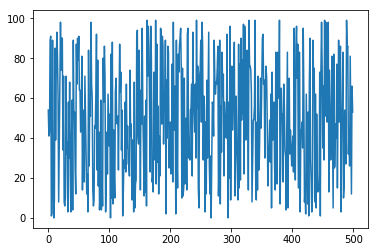

In [22]:
not_random_walk = np.random.randint(0, 100, size = 500)
plt.plot(not_random_walk)

## Random Walk 

* Drunkard walk, every data point is roughly dependent on its previous but have some random element associated with it
* The current observation is a random step from the previous observation.
* Simulate Random Walk:
    1. Start with a random number of either -1 or 1.
    2. Randomly select a -1 or 1 and add it to the observation from the previous time step.
    3. Repeat step 2 for as long as you like.

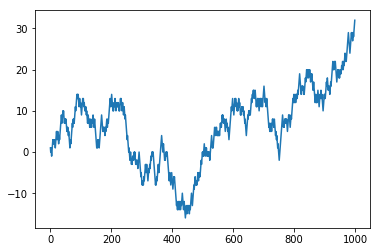

In [29]:
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
plt.plot(random_walk)

### Random_Walk - Autocorrelation
* Check with autocorrelation plot : good dependency with previous and then sharp drop    

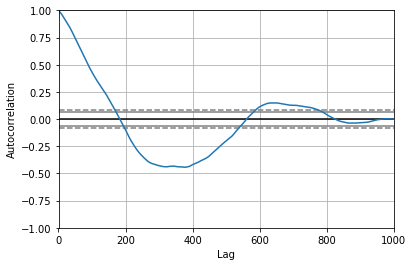

In [28]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(random_walk)

### Random_Walk - Stationarity
* They are non-stationary -> stats : dickey fuller test

In [32]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.638275
p-value: 0.862097
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


* test statistic (-0.6) is higher than all of critical values
* TS does appear to be non-stationary with a low likelihood of the result being a statistical fluke.

## Predicting Random Walk

* it is not predictable -> naive or persistance prediction works better than other approaches -> predicting previous value
* Despite autocorrelation suggesting significant lag correlation, it is not ideal to predict random walk


## Random Walk Summary

* A random walk is one in which future steps or directions cannot be predicted on the basis of past history. When the term is applied to the stock market, it means that short-run changes in stock prices are unpredictable.
* Random walk with first difference can be made stationary -> correlogram will be zero.
* Differenced random walk -> white noise
* Naive forecast is usually better
* TS shows a strong temporal dependence that decays linearly or in a similar pattern.

## White Noise

* Series thats not predictable -> sequence of random numbers
* Conditions:
    * Mean = 0
    * Std Dev constant -> doesnt change over time
    * Correlation with its lag is not significant
    
* Test for white noise
    * Plot
    * Compare mean and std dev
    * Autocorrelation plot

### Test : Plotting

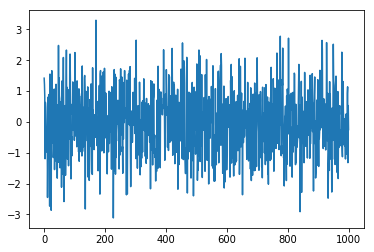

In [47]:
# white noise
white_noise = np.random.randn(1000)

# Plot
plt.plot(np.arange(len(white_noise)), white_noise);

# Observation : Mean and Std Dev dont change over time

### Test : Mean over time

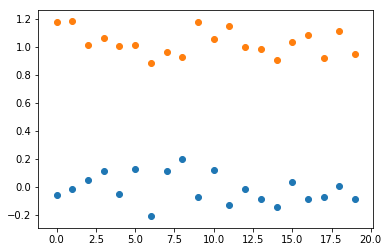

In [48]:
white_noise_chunks = np.split(white_noise, 20)
mean, std = [], []

for chunk in white_noise_chunks:
    mean.append(np.mean(chunk))
    std.append(np.std(chunk))
               
plt.scatter(np.arange(len(mean)), mean)
plt.scatter(np.arange(len(std)), std)
            
# Observations : Slight variations but no significant difference

### Test : auto_correlation plot

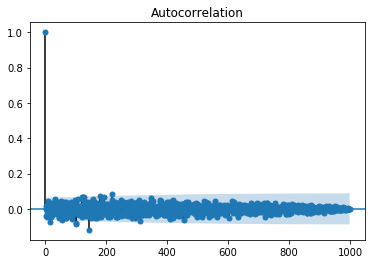

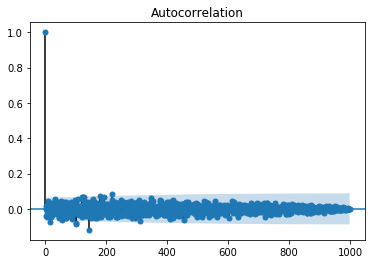

In [51]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(white_noise)

# Observation : Only lag 0 is significant (obvious!) and otherwise not significant

## Summary

* Dont bother forecast for both Random Walk and White Noise
* Random Walk : Naive forecast work better (previous time forecast)
* White Noise : Already best case scenario. 
* If there is pattern in residuals -> improvement possible